Quadrupole breakout

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import tricontour_animation as ta
import h5py
import numpy as np
import pylab
import matplotlib.pyplot as plt
import csv


In [4]:
ta.main_rho("../../project_1/big_runs/round_7/coy_long_offset_lowering/output")

100%|█████████████████████████████████████████| 134/134 [00:02<00:00, 44.85it/s]


In [5]:
ta.main_p("../../project_1/big_runs/round_7/coy_long_offset_lowering/output")

100%|█████████████████████████████████████████| 134/134 [00:02<00:00, 49.84it/s]


In [ ]:
ta.main_vel("../../project_1/big_runs/round_6/coy_3/output")

In [9]:
ta.main_s("../../project_1/big_runs/round_7/hom_lowering/output")

100%|█████████████████████████████████████████| 151/151 [00:05<00:00, 28.09it/s]


In [ ]:
ta.main_verts("../../project_1/big_runs/round_6/coy_3/output")

In [ ]:
ta.main_tracer_depth("depth")

In [ ]:
ta.main_tracer("38")

In [ ]:
ta.main_tracer("35")

In [ ]:
ta.main_tracer("33")

In [ ]:
ta.main_tracer("35_94")

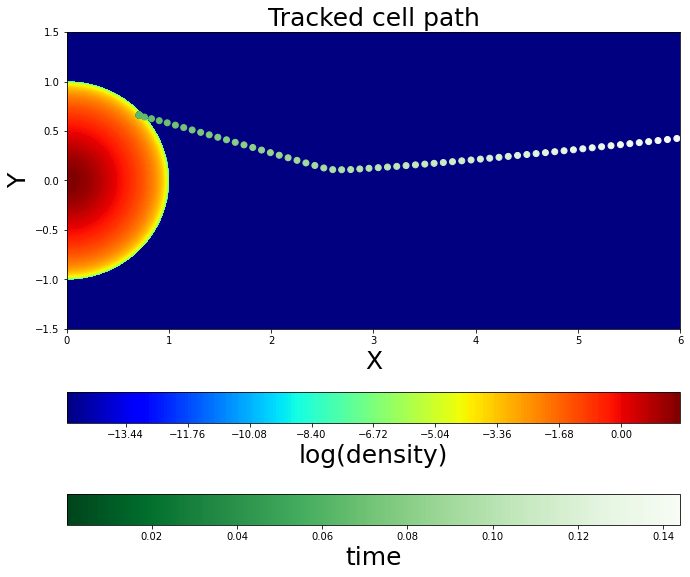

In [25]:
# plot with cell path

fig = plt.figure(figsize=(11,10))
ax = plt.subplot(111)

N = 109;
lst = np.zeros((N,2))
t = np.array([])
for i in range(N):
    with h5py.File("../../project_1/big_runs/round_6/coy_3/output/snapshot_{:n}.h5".format(i),
                   'r') as f:
        stkr = f['stickers']['43'];
        idx = np.where(stkr)
        x = np.array(f['geometry']['x_coordinate'])[idx];
        y = np.array(f['geometry']['y_coordinate'])[idx];
        time = np.array(f['time'])
        t = np.append(time,t)
        lst[i,0], lst[i,1] = x,y
        
    

with h5py.File("../../project_1/big_runs/round_6/coy_3/output/snapshot_0.h5",
               'r') as f:
    gamma = 4/3
    x = np.array(f['geometry']['x_coordinate']);
    y = np.array(f['geometry']['y_coordinate']);
    rho = np.array(f['hydrodynamic']['density']);
    p = np.array(f['hydrodynamic']['pressure']);
    s = p/rho**gamma
    stkr_n = f['stickers']['43'];
    idx_n = np.where(stkr_n)
    

t = np.flip(t)
fs = 25
dp = ax.tricontourf(x,y,np.log10(rho), 270, cmap='jet');
cp = ax.scatter(lst[:,0],lst[:,1], c=t, cmap='Greens_r')
#ax.scatter(x[idx_n]-0.005, y[idx_n]+0.01, color='w', s=40)

ccb = fig.colorbar(cp, ax=ax, location='bottom', pad=0.07)
ccb.set_label("time", fontsize=fs)
dcb = fig.colorbar(dp, ax=ax,  location='bottom')
dcb.set_label("log(density)", fontsize=fs)
lim = 3;
ax.set_xlim(0,2*lim);
ax.set_ylim(-1.5,1.5);
ax.set_title("Tracked cell path", fontsize=fs)
ax.set_xlabel("X", fontsize=fs)
ax.set_ylabel("Y", fontsize=fs)
plt.savefig("tracked_cell.png")
plt.show()

In [ ]:
N = 95
arr = np.zeros(N)
r = np.linspace(0,N, N)
for i in range(N):
    with h5py.File('output/snapshot_{:n}.h5'.format(i),
                   'r') as f:
        #print(f['stickers'].keys())
        tracer = np.array(f['stickers']['33'])
        print(np.where(tracer))
        p = np.array(f['hydrodynamic']['pressure'])[idx];
        rho = np.array(f['hydrodynamic']['density']);
        x = np.array(f['geometry']['x_coordinate']);
        y = np.array(f['geometry']['y_coordinate']);
        #print(idx, p)
        arr[i] = p

plt.plot(r,arr)
plt.show()
    
    

In [ ]:
lim = 4
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
with h5py.File('../../project_1/big_runs/round_6/coy_3/output/snapshot_48.h5',
                   'r') as f:
        p = np.array(f['hydrodynamic']['pressure']);
        rho = np.array(f['hydrodynamic']['density']);
        x = np.array(f['geometry']['x_coordinate']);
        y = np.array(f['geometry']['y_coordinate']);
        #plt.scatter(x,y,s=1)
        sp = ax.tricontourf(x,y,np.log10(rho), 200, cmap='jet')
        fig.colorbar(sp)
        ax.set_xlim(0,lim+.6)
        ax.set_ylim(-lim,lim)
        plt.show()

In [ ]:
# GOOD PLOT QUARTERS
fg_sz = 8
shrnk = 0.5
ft_sz1 = 22
ft_sz2 = 18
with h5py.File("../../project_1/big_runs/round_7/coy_long/output/snapshot_75.h5"
                   ,'r') as f:
                gamma = 4/3
                p = np.array(f['hydrodynamic']['pressure'])
                p = np.append(p,p)
                rho = np.array(f['hydrodynamic']['density'])
                rho = np.append(rho,rho)
                x = np.array(f['geometry']['x_coordinate'])
                x = np.append(x,-x)
                y = np.array(f['geometry']['y_coordinate'])
                y = np.append(y,-y)
                v_x = np.array(f['hydrodynamic']['x_velocity'])
                v_x = np.append(v_x,-v_x)
                v_y = np.array(f['hydrodynamic']['y_velocity'])
                v_y = np.append(v_y,-v_y)
                t = np.array(f['time'])
                
                r = np.sqrt(x**2 + y**2)
                v_r = x/r*v_x + y/r*v_y
                c_s = np.sqrt(gamma*p/rho);
                s = p/rho**gamma;
                
                fig = plt.figure(figsize=(12,8))
                gs = fig.add_gridspec(2,2, hspace=0, wspace=0)
                axs = gs.subplots()
                
                clr = "k"
                cmp = "jet"
                lvls = 250
                pp = axs[0,0].tricontourf(x,y, np.log10(p), lvls, cmap=cmp) #tl
                dp =axs[0,1].tricontourf(x,y, np.log10(rho),lvls, cmap=cmp) #tr
                vp =axs[1,0].tricontourf(x,y, np.abs(v_r),lvls, cmap=cmp) #bl
                sp =axs[1,1].tricontourf(x,y, np.log10(s),lvls, cmap=cmp, vmin=4) #br
                
                lim=1000
                
                pcb = fig.colorbar(pp, ax=axs[0,0], location='left', pad=0.2)
                pcb.set_label('log(Pressure)', color=clr, fontsize=ft_sz1)
                pcb.ax.yaxis.set_tick_params(color=clr, labelcolor=clr)
                pcb.ax.yaxis.set_ticks_position('left')
                pcb.ax.yaxis.set_label_position('left')
                axs[0,0].set_ylim(0,lim)
                axs[0,0].set_xlim(-lim,0)
                axs[0,0].tick_params(color=clr, labelcolor=clr, 
                                     bottom=False, labelbottom=False)
                axs[0,0].spines['bottom'].set_visible(False)
                axs[0,0].spines['right'].set_visible(False)
                #axs[0,0].annotate("Pressure", (-8,8.3), annotation_clip=False, 
                 #                 fontsize=ft_sz2, color=clr)
                axs[0,0].annotate("Pressure", (-1000,1050), annotation_clip=False, 
                                  fontsize=ft_sz2, color=clr)
                
                dcb = fig.colorbar(dp, ax=axs[0,1], location='right', pad=0.2)
                dcb.set_label('log(Density)', color=clr, fontsize=ft_sz1)
                dcb.ax.yaxis.set_tick_params(color=clr, labelcolor=clr)
                dcb.ax.yaxis.set_ticks_position('right')
                dcb.ax.yaxis.set_label_position('right')
                axs[0,1].set_ylim(0,lim)
                axs[0,1].set_xlim(0,lim)
                axs[0,1].tick_params(color=clr, labelcolor=clr, 
                                     bottom=False, labelbottom=False,
                                     left=False, labelleft=False,
                                     right=True, labelright=True)
                axs[0,1].spines['bottom'].set_visible(False)
                axs[0,1].spines['left'].set_visible(False)
                # axs[0,1].annotate("Density", (5.2,8.3), annotation_clip=False, 
                #                   fontsize=ft_sz2, color=clr)
                axs[0,1].annotate("Density", (600,1050), annotation_clip=False, 
                                  fontsize=ft_sz2, color=clr)
                
                vcb = fig.colorbar(vp, ax=axs[1,0], location='left', pad=0.2)
                vcb.set_label('Velocity', color=clr, fontsize=ft_sz1)
                vcb.ax.yaxis.set_tick_params(color=clr, labelcolor=clr)
                vcb.ax.yaxis.set_ticks_position('left')
                vcb.ax.yaxis.set_label_position('left')
                axs[1,0].set_ylim(-lim,0)
                axs[1,0].set_xlim(-lim,0)
                axs[1,0].tick_params(color=clr, labelcolor=clr)
                axs[1,0].spines['top'].set_visible(False)
                axs[1,0].spines['right'].set_visible(False)
                #axs[0,0].annotate("Velocity", (-8,-9.2), annotation_clip=False, 
                 #                 fontsize=ft_sz2, color=clr)
                axs[0,0].annotate("Velocity", (-1000,-1150), annotation_clip=False, 
                                  fontsize=ft_sz2, color=clr)
                
                scb = fig.colorbar(sp, ax=axs[1,1], location='right', pad=0.2)
                scb.set_label('log(Entropy)', color=clr, fontsize=ft_sz1)
                scb.ax.yaxis.set_tick_params(color=clr, labelcolor=clr)
                axs[1,1].set_ylim(-lim,0)
                axs[1,1].set_xlim(0,lim)
                axs[1,1].tick_params(color=clr, labelcolor=clr,
                                     left=False, labelleft=False,
                                     right=True, labelright=True)
                axs[1,1].spines['top'].set_visible(False)
                axs[1,1].spines['left'].set_visible(False)
                # axs[1,1].annotate("Entropy", (5.2,-9.2), annotation_clip=False, 
                #                   fontsize=ft_sz2, color=clr)
                axs[1,1].annotate("Entropy", (600,-1150), annotation_clip=False, 
                                  fontsize=ft_sz2, color=clr)
                
                fig.suptitle('t = %1.4f' % np.array(f['time'])[0], color=clr, fontsize=ft_sz2, y = 0.92)
                axs[1,0].set_xlabel("X", loc='right', color=clr, fontsize=ft_sz2)
                axs[1,0].set_ylabel("Y", loc='top', color=clr, fontsize=ft_sz2)
                plt.savefig("large_plot.png")
                plt.show()

In [ ]:
with h5py.File("../../project_1/big_runs/round_7/coy_long/output/snapshot_75.h5"
                   ,'r') as f:
        t = f['time'][0]
        print(t)

12


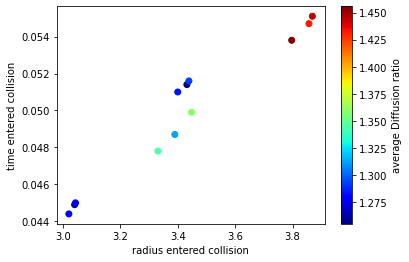

In [19]:
#Time, Radius, D distribution

fname = "dist_graph.txt"
data = np.loadtxt(fname, delimiter=",", comments='#')
r = data[:,3]
t = data[:,4]
diff = data[:,:3]
print(len(diff))
ave_diff = np.zeros(len(diff))
for i in range(len(diff)):
    row = diff[i,:]
    ave = np.round(np.average(row),5)
    ave_diff[i] = ave
plt.scatter(r,t, c=ave_diff, cmap='jet')
cb = plt.colorbar()
cb.set_label("average Diffusion ratio")
plt.ylabel("time entered collision")
plt.xlabel("radius entered collision")
plt.show()
    

In [ ]:
fmass = "../../project_1/big_runs/round_6/coy_3/added_mass.txt"
fpres = "../../project_1/big_runs/round_6/coy_3/added_pressure.txt"

added_m = np.loadtxt(fmass, delimiter=',')[:,0]
added_p = np.loadtxt(fpres, delimiter=',')[:,0]

tot_m = np.sum(added_m)
tot_p = np.sum(added_p)
print("total mass added: {:e} \n total pressure added: {:e}".format(tot_m,tot_p))

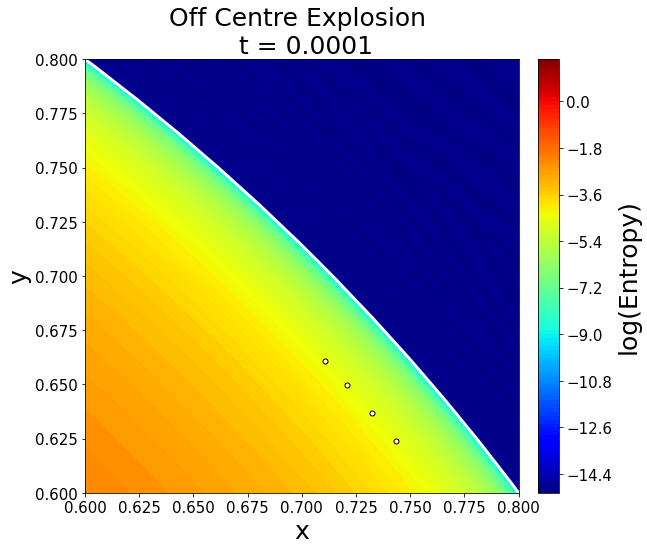

In [11]:
#GOOD PLOT SINGLE

with h5py.File("../../project_1/big_runs/round_6/coy_3/output/snapshot_0.h5"
                   ,'r') as f:
                gamma = 4/3
                p = np.array(f['hydrodynamic']['pressure'])
                p = np.append(p,p)
                rho = np.array(f['hydrodynamic']['density'])
                rho = np.append(rho,rho)
                x = np.array(f['geometry']['x_coordinate'])
                x = np.append(x,-x)
                y = np.array(f['geometry']['y_coordinate'])
                y = np.append(y,y)
                v_x = np.array(f['hydrodynamic']['x_velocity'])
                v_x = np.append(v_x,-v_x)
                v_y = np.array(f['hydrodynamic']['y_velocity'])
                v_y = np.append(v_y,-v_y)
                t = np.array(f['time'])
                
                idx1 = np.where(f['stickers']['40'])
                idx2 = np.where(f['stickers']['41'])
                idx3 = np.where(f['stickers']['42'])
                idx4 = np.where(f['stickers']['43'])
                
                
                r = np.sqrt(x**2 + y**2)
                v_r = x/r*v_x + y/r*v_y
                
                s = p/rho**gamma
                
                c_s = np.sqrt(gamma*p/rho);
                c_max_ind = np.argmax(c_s)
                
                
                T = p/rho
                bs = rho**2*np.sqrt(T)
                Rx = x[np.where((r >= 0.99) & (r <= 1.01))]
                Ry = y[np.where((r >= 0.99) & (r <= 1.01))]
                clr = "k"
                fig = plt.figure(figsize=(8.5,8))
                ax = plt.subplot(111)
                
                ms = 10
                mw = 1
                ax.plot(x[idx1],y[idx1], 'w.', markersize = ms,
                        markeredgecolor='k', markeredgewidth=mw)
                ax.plot(x[idx2],y[idx2], 'w.', markersize = ms,
                        markeredgecolor='k', markeredgewidth=mw)
                ax.plot(x[idx3],y[idx3], 'w.', markersize = ms,
                        markeredgecolor='k', markeredgewidth=mw)
                ax.plot(x[idx4],y[idx4], 'w.', markersize = ms,
                        markeredgecolor='k', markeredgewidth=mw)

                circle = plt.Circle((0,0), 1, color="w", fill=False, linewidth=3)

                sp = ax.tricontourf(x, y, np.log10(rho),
                                  140, cmap='jet')
                ax.add_patch(circle)

                fs = 25
                ax.set_title('Off Centre Explosion \n t = %1.4f' % np.array(f['time'])[0],
                             color=clr, fontsize=fs)
                cb = fig.colorbar(sp, fraction=0.046, pad=0.04)
                cb.set_label('log(Entropy)', color=clr, fontsize=fs)
                cb.ax.yaxis.set_tick_params(color=clr, labelcolor=clr, labelsize=15)
                ax.axis('scaled')
                ax.set_xlabel("x", color=clr, fontsize=fs)
                ax.set_ylabel("y", color=clr, fontsize=fs)
                ax.spines['bottom'].set_color(clr)
                ax.tick_params(colors=clr, labelsize = 15)
                ax.spines['left'].set_color(clr)
                #ax.tick_params(axis='y', colors=clr)
                lim=4
                ax.set_xlim((0.6,0.8))
                ax.set_ylim((0.6,0.8))
                #plt.savefig("off_centre_plot.png")

In [ ]:
#GOOD PLOT LOOP

for i in range(51):
    with h5py.File("output/snapshot_{:n}.h5".format(i)
                   ,'r') as f:
                gamma = 4/3
                p = np.array(f['hydrodynamic']['pressure'])
                rho = np.array(f['hydrodynamic']['density'])
                x = np.array(f['geometry']['x_coordinate'])
                y = np.array(f['geometry']['y_coordinate'])
                c_s = np.sqrt(gamma*p/rho);
                c_max_ind = np.argmax(c_s)
                #print(c_max_ind, c_s[c_max_ind])
    #             x = np.concatenate((-x, x))
    #             y = np.concatenate((-y, y))
    #             rho = np.concatenate((rho, rho))
                T = p/rho
                bs = rho**2*np.sqrt(T)
                R = x**2 + y**2
                Rx = x[np.where((R >= 0.99) & (R <= 1.01))]
                Ry = y[np.where((R >= 0.99) & (R <= 1.01))]
                clr = "k"
                fig = plt.figure()
                ax = plt.subplot(111)

                circle = plt.Circle((0,0), 1, color="w", fill=False)


                # stkr1 = f['stickers']['38']
                # stkr2 = f['stickers']['35']
                #stkr3 = f['stickers']['33']
                # stkr4 = f['stickers']['35_94']
                # idx1 = np.where(stkr1)
                # idx2 = np.where(stkr2)
                #idx3 = np.where(stkr3)
    #             idx4 = np.where(stkr4)

    #             x1, y1 = x[idx1], y[idx1]
    #             x2, y2 = x[idx2], y[idx2]
                #x3, y3 = x[idx3], y[idx3]
                # x4, y4 = x[idx4], y[idx4]
                # x_arr = [x1,x2,x3,x4]
                # y_arr = [y1,y2,y3,y4]


                #ax.plot(x3, y3, 'w.', markersize=5)

                sp = ax.tricontourf(x, y, np.log10(rho),
                                  50, cmap='plasma')
                ax.tricontourf(-x, y, np.log10(rho),
                               50, cmap='plasma')
                #ax.add_patch(circle)

                ax.set_title('Density Distribution \n t = %1.4f' % np.array(f['time'])[0], color=clr)
                cb = fig.colorbar(sp)
                cb.set_label('log(Density)', color=clr)
                cb.ax.yaxis.set_tick_params(color=clr, labelcolor=clr)
                ax.axis('scaled')
                ax.set_xlabel("x", color=clr)
                ax.set_ylabel("y", color=clr)
                ax.spines['bottom'].set_color(clr)
                ax.tick_params(axis='x', colors=clr)
                ax.spines['left'].set_color(clr)
                ax.tick_params(axis='y', colors=clr)
                lim=3
                ax.set_xlim((-lim,lim))
                ax.set_ylim((-lim,lim))
                pylab.savefig("images/img{:n}.png".format(i))

In [ ]:
fig = plt.figure(figsize=(12,12))
gs = fig.add_gridspec(1, 1)
fg = gs.subplots()


with h5py.File("output/snapshot_0.h5", 'r') as f:
    x = np.array(f['geometry']['x_coordinate']);
    y = np.array(f['geometry']['y_coordinate']);
    rho = np.array(f['hydrodynamic']['density'])
    fg.scatter(x,y, s=1)
    r_ind = np.where(np.sqrt(x**2 + y**2) < 1)
    int_cells = np.size(x[r_ind])
    cells = np.size(x)
    res = np.sqrt(int_cells/(np.pi/2))
    print("""There are {:n} cells, {:n} interior to the stellar radius and
    the effective resolution of the stellar radius is {:n}""".format(cells, int_cells, res))
    # rho_s = rho[np.where(rho>1.1e-15)]
    rho_s = rho[r_ind]
    rho_min = np.amin(rho_s)
    typ_rho = (np.pi/(2*int_cells))**(3/2)
    print("Min rho={:e}, typical min rho={:e}".format(rho_min, typ_rho))
    fg.set_xlim(0,0.1)
    fg.set_ylim(-1,1)
    plt.show()
    

In [ ]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

lims = 2
with h5py.File('coy_long/output/snapshot_0.h5','r') as f:
            x = np.array(f['geometry']['x_coordinate'])
            y = np.array(f['geometry']['y_coordinate'])
            vert_x_raw = np.array(f['geometry']['x_vertices'])
            vert_y_raw = np.array(f['geometry']['y_vertices'])
            vert_n_raw = np.array(f['geometry']['n_vertices'])
            vert_idx_list = np.concatenate(([0],np.cumsum(vert_n_raw))).astype(int)

            polygon_list = [Polygon(
                    np.vstack((vert_x_raw[low_idx:high_idx],
                                  vert_y_raw[low_idx:high_idx])).T)
                            for low_idx, high_idx
                            in zip(vert_idx_list[:-1], vert_idx_list[1:])]

            patch_collection = PatchCollection(polygon_list, linestyle='-')
            #z_list = np.clip(np.log10(f['hydrodynamic']['density']), -20, 5)
            z_list = np.log10(f['hydrodynamic']['density']) 
            patch_collection.set_array(z_list)
            #patch_collection.set_array(np.log10(f['hydrodynamic']['density']))
            #patch_collection.set_array(f['hydrodynamic']['density'])
            fig = plt.figure(figsize=(12,12))
            gs = fig.add_gridspec(1, 1)
            ax = gs.subplots()
            ax.add_collection(patch_collection)
            pylab.plot(x,y, 'w.', markersize=0.1)
            pylab.suptitle('t = %.4f' % np.array(f['time'])[0])
            pylab.axis('scaled')
            pylab.xlim((0,lims))
            pylab.ylim((-lims,lims))
            #pylab.savefig(fname.replace('.h5','.png'))

In [ ]:
data = np.loadtxt("tracked_cell_33_97.txt", delimiter=',');
data = np.transpose(data);
t = data[1]
x = data[2]
y = data[3]
print(len(x), y)
plt.scatter(x,y, c=t, cmap='viridis');
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0,4);
plt.ylim(0,4);
plt.colorbar()
plt.show()
            

In [ ]:
def g_arr(r, R=1, dr_c=0.05, dr_s=0.005, alpha=0.05, b=1):
    g1 = dr_s + (dr_c - dr_s)*(1-r/R)**b;
    #g2 = dr_s + (2*alpha*R - dr_s)*(r/R - 1);
    g = r*0;
    #g[r<R] = g1[r<R];
    #g[r>=R] = g2[r>R];
    gmax = alpha*r/R;
    res = g1;
    #res[r>R] = np.minimum(res[r>R], gmax[r>R]);
    return res



In [ ]:
rho = np.loadtxt("polytrope_rho.txt")
r = np.loadtxt("polytrope_r.txt")
m = 4*np.pi*r**2*rho
m_int= np.cumsum(m)
E_in = 1
v_s = 0.794*np.sqrt(E_in/m)*(m/(rho*r**3))**0.19


dr = g_arr(r, 1, 0.025, 0.002, 0.01, 1);

dt = 0.3*dr/v_s
csEXT = dr/dt
print(np.nanmin(csEXT))

In [ ]:
print(dt_min)
plt.scatter(r, dt)
plt.show()

In [ ]:
import re

In [ ]:

fpath1 = "runs_data/big_runs/first_round/-10_0p05_0p0025_0p01/snapshot_96"
fpath2 = "runs_data/big_runs/f_27_f_04/-10_0p05_0p0025_0p01/snapshot_78"
fpath3 = "output/snapshot_20"

lst = re.findall(r'_(\d+)', fpath3)[-1]
#brk = int(re.search(r'_(\d+)\.',fpath3).group(1))
res = int(re.findall(r'_(\d+)',fpath3)[-1])
print(lst, type(lst), res, type(res))